Diabetes dataset:
* Used an Artificial Neural Network (ANN) to predict diabetes progression in 1 year
* use keras.predict_classes() for classification prediction
* Use keras.predict_proba() for roc_curve() to get fpr, tpr, thresholds

* When you plot the ROC curve, you can 'annotate' with threshold info;
so you can read the threshold for a given fpr, tpr

* use confusion_matrix.ravel() to get the tn,fp, fp, tp values for BINARY classification

* Use np.where() to convert y (quantitative values) to classes (0,1)
* Do scaling before the test/train split to avoid scaling multiple times

* Use model.summary() to get details of the layers

* Use median value to balance the dataset

* Accuracy dropped after dataset balanced ???

In [88]:
import keras
from keras.models  import (Sequential)
from keras.layers import (Dense, Activation)
from sklearn.model_selection import train_test_split
from sklearn.datasets import (load_diabetes)
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [118]:
def convert_to_classes(y_scaled, median_val):
    y_mod = np.where(y_scaled>median_val, 1, 0)

    np.sum(y_mod), np.size(y_mod)
    true_percent = np.sum(y_mod)/np.size(y_mod)
    print(true_percent)
    if true_percent < 0.45 or true_percent > 0.55:
        print('Unbalanced dataset')
    else:
        print('Balanced Dataset')
        
    return y_mod

In [119]:
dataset = load_diabetes()

X = dataset.data
y = dataset.target
y = np.reshape(y, (-1,1))

# Translate the target values ( y) from a quantitave measure to 
# classes (0/1) by using a threshold of 0.5 to decide patient has 
# diabetes
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)


In [121]:
y_mod = convert_to_classes(y_scaled, 0.5)

0.3257918552036199
Unbalanced dataset


In [122]:
#Balance the dataset by using the median value to create classes
median = np.median(y_scaled)
print('Median value: {:.2f}'.format(median))
y_mod = convert_to_classes(y_scaled, median)

Median value: 0.36
0.5
Balanced Dataset


In [123]:
feature_names = list(dataset.feature_names)
print('feature_names: {0}'.format(feature_names))
X_train, X_test, y_train, y_test = train_test_split(X, y_mod, test_size = 0.3, random_state = 0)
  

feature_names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [124]:
y_train.shape, X_train.shape

((309, 1), (309, 10))

In [125]:
np.max(X), np.min(X)

(0.198787989657293, -0.137767225690012)

In [126]:
np.max(y_train), np.min(y_train)

(1, 0)

In [127]:
np.max(y_test), np.min(y_test)
#y_test


(1, 0)

In [128]:
#y_train=np.reshape(y_train, (-1, 1))
y_test.shape

(133, 1)

In [129]:
ann_model = Sequential()
ann_model.add(Dense(20, input_dim=(10),activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________


In [130]:
#Configure the model for training by setting the objective function & the optimizer
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
#Train the model for a fixed number of epochs
hist = ann_model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=2)

Train on 247 samples, validate on 62 samples
Epoch 1/100
 - 1s - loss: 0.6888 - acc: 0.5587 - val_loss: 0.6815 - val_acc: 0.6452
Epoch 2/100
 - 0s - loss: 0.6717 - acc: 0.7287 - val_loss: 0.6620 - val_acc: 0.6935
Epoch 3/100
 - 0s - loss: 0.6456 - acc: 0.7166 - val_loss: 0.6306 - val_acc: 0.7419
Epoch 4/100
 - 0s - loss: 0.6122 - acc: 0.7328 - val_loss: 0.5920 - val_acc: 0.7097
Epoch 5/100
 - 0s - loss: 0.5816 - acc: 0.7368 - val_loss: 0.5709 - val_acc: 0.7258
Epoch 6/100
 - 0s - loss: 0.5512 - acc: 0.7287 - val_loss: 0.5415 - val_acc: 0.7419
Epoch 7/100
 - 0s - loss: 0.5249 - acc: 0.7490 - val_loss: 0.5244 - val_acc: 0.7581
Epoch 8/100
 - 0s - loss: 0.5093 - acc: 0.7368 - val_loss: 0.5131 - val_acc: 0.7581
Epoch 9/100
 - 0s - loss: 0.4970 - acc: 0.7571 - val_loss: 0.4978 - val_acc: 0.7742
Epoch 10/100
 - 0s - loss: 0.4905 - acc: 0.7652 - val_loss: 0.4921 - val_acc: 0.7742
Epoch 11/100
 - 0s - loss: 0.4825 - acc: 0.7692 - val_loss: 0.4869 - val_acc: 0.7903
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.3874 - acc: 0.7976 - val_loss: 0.5290 - val_acc: 0.7581
Epoch 98/100
 - 0s - loss: 0.3916 - acc: 0.7935 - val_loss: 0.5345 - val_acc: 0.7742
Epoch 99/100
 - 0s - loss: 0.3890 - acc: 0.8016 - val_loss: 0.5280 - val_acc: 0.6935
Epoch 100/100
 - 0s - loss: 0.3991 - acc: 0.7814 - val_loss: 0.5311 - val_acc: 0.7419


In [132]:
#y_test
test_loss, test_acc = ann_model.evaluate(X_test, y_test)
print('Test Loss: {:.2f} Test Acc: {:.2f}'.format(test_loss, test_acc))

133/133 [==============================] - 0s 52us/step
Test Loss: 0.51 Test Acc: 0.74


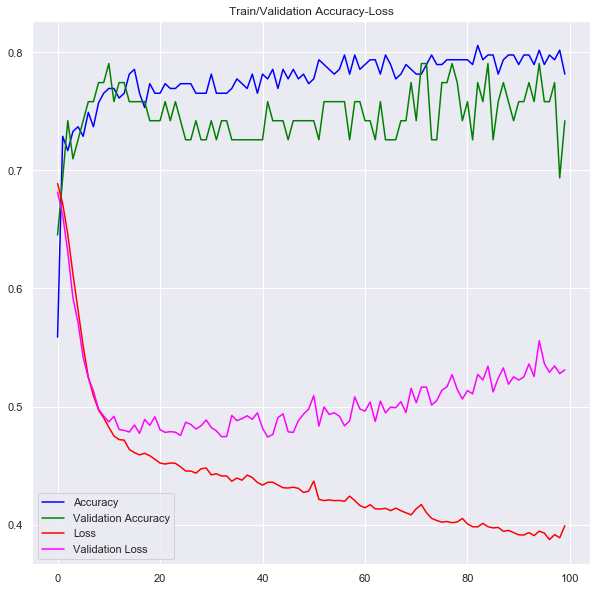

In [133]:
#Plot the loss + Accuracy

epochs = range(len(hist.history['acc']))
acc = hist.history['acc']
loss = hist.history['loss']
                    
val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']
                        
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, c='blue', label='Accuracy')  
plt.plot(epochs, val_acc, c='green', label='Validation Accuracy')
plt.plot(epochs, loss, c='red', label='Loss')
plt.plot(epochs, val_loss, c='magenta', label='Validation Loss') 
                        
plt.title('Train/Validation Accuracy-Loss')
plt.legend()
plt.show()
                        

In [134]:
y_pred = ann_model.predict_classes(X_test)
y_pred.shape, y_test.shape

((133, 1), (133, 1))

In [137]:
# For binary case: use ravel() to get the 4 values : tp, tn, fp, fn
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
print('TP: {} TN: {} FP:{} FN: {}'.format(tp, tn, fp, fn))

TP: 49 TN: 50 FP:18 FN: 16


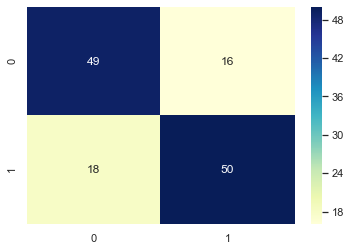

In [136]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
#y_test[:5], y_pred[:5]

sns.heatmap(cm, annot=True,cmap="YlGnBu")

In [138]:
#probabilities
y_pred_prob = ann_model.predict_proba(X_test)

print(y_pred_prob.shape)
#Note: the second dimension of the shape is 1 instead of 2 
#(as keras.predict_proba() is only returning the probability of 
# the instance belonging to class 1)
y_pred_prob[:5]

(133, 1)


array([[0.9820944 ],
       [0.9820678 ],
       [0.565816  ],
       [0.48134807],
       [0.6466745 ]], dtype=float32)

In [139]:
from sklearn.metrics import roc_curve, auc

#note: using the probability to calculate fpr,tpr,threshold
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_val = auc(fpr, tpr)
fpr, tpr, threshold, auc_val

(array([0.        , 0.        , 0.        , 0.01538462, 0.01538462,
        0.03076923, 0.03076923, 0.04615385, 0.04615385, 0.06153846,
        0.06153846, 0.07692308, 0.07692308, 0.09230769, 0.09230769,
        0.12307692, 0.12307692, 0.15384615, 0.15384615, 0.2       ,
        0.2       , 0.26153846, 0.26153846, 0.29230769, 0.29230769,
        0.32307692, 0.32307692, 0.4       , 0.4       , 0.41538462,
        0.41538462, 0.47692308, 0.47692308, 0.66153846, 0.66153846,
        0.67692308, 0.67692308, 0.69230769, 0.69230769, 0.72307692,
        0.72307692, 0.73846154, 0.73846154, 0.83076923, 0.83076923,
        1.        ]),
 array([0.        , 0.01470588, 0.10294118, 0.10294118, 0.27941176,
        0.27941176, 0.32352941, 0.32352941, 0.36764706, 0.36764706,
        0.5       , 0.5       , 0.54411765, 0.54411765, 0.67647059,
        0.67647059, 0.70588235, 0.70588235, 0.72058824, 0.72058824,
        0.73529412, 0.73529412, 0.76470588, 0.76470588, 0.79411765,
        0.79411765, 0.8382

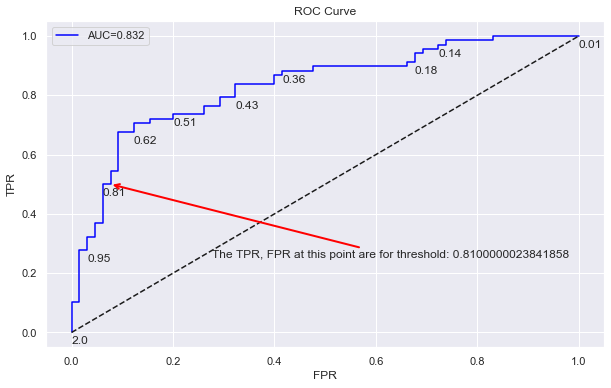

In [140]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, c='blue', label='AUC={:,.3f}'.format(auc_val))
plt.plot((0,1), (0,1), 'k--')
for x, y, thresh in zip(fpr[::5], tpr[::5], threshold[::5]):
    plt.annotate(np.round(thresh,2), (x, y-0.04))
rnd_idx = 11
plt.annotate('The TPR, FPR at this point are for threshold: {}'.format(np.round(threshold[rnd_idx], 2)),
xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
arrowprops=dict(color='red', lw=2, arrowstyle='->'))

plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()